<a href="https://colab.research.google.com/github/dayananddaya/Input-features/blob/main/Dessertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/dayananddaya/Project/blob/main/archive.zip.001


--2022-09-19 09:21:16--  https://github.com/dayananddaya/Project/blob/main/archive.zip.001
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘archive.zip.001’

archive.zip.001         [ <=>                ] 134.46K  --.-KB/s    in 0.02s   

2022-09-19 09:21:16 (5.70 MB/s) - ‘archive.zip.001’ saved [137684]



In [ ]:
!7z x /content/archive.zip.001


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 137684 bytes (135 KiB)

Extracting archive: /content/archive.zip.001
  0% 1 Open           ERROR: /content/archive.zip.001
archive.zip
Open ERROR: Can not open the file as [zip] archive


  0%    
Can't open as archive: 1
Files: 0
Size:       0
Compressed: 0


In [ ]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 8.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633951 sha256=39d8ee30598098ff42830472b6f4f7e0435ab72b47b1250a9853e00a2de7a5b9
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise import SVD
from surprise.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from surprise import Reader
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from collections import defaultdict
from sklearn.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import KFold

In [ ]:
anime_data=pd.read_csv('/content/anime.csv')
ratings=pd.read_csv('/content/Ratings.csv')

In [ ]:
anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
anime_data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [ ]:
ratings=ratings.dropna()

In [ ]:
# Checking for the null values in the data

anime_data.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
ratings.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [ ]:
#Drop all null values from the dataset as the propostion of the null values is less so it is best drop all the values which have null values.
anime_dataset = anime_data.dropna()

#Changing unknown "episode" values to 0.
anime_dataset.loc[anime_dataset["episodes"] == "Unknown", "episodes"] = 0
anime_dataset["episodes"] = anime_dataset["episodes"].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
anime_dataset['name']

0                                           Kimi no Na wa.
1                         Fullmetal Alchemist: Brotherhood
2                                                 Gintama°
3                                              Steins;Gate
4                                            Gintama&#039;
                               ...                        
12289         Toushindai My Lover: Minami tai Mecha-Minami
12290                                          Under World
12291                       Violence Gekiga David no Hoshi
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293                     Yasuji no Pornorama: Yacchimae!!
Name: name, Length: 12017, dtype: object

EDA

In [ ]:
# adapted from https://www.kaggle.com/code/bastianbagas/starter-anime-recommendations-database-d0ac17ee-d
def plotCorrelationMatrix(dataFrame, graphWidth):
   
    dataFrame = dataFrame.dropna('columns') # drop columns with NaN
    dataFrame = dataFrame[[col for col in dataFrame if dataFrame[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if dataFrame.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({dataFrame.shape[1]}) is less than 2')
        return
    corr = dataFrame.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1, cmap='viridis')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix' , fontsize=10)
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


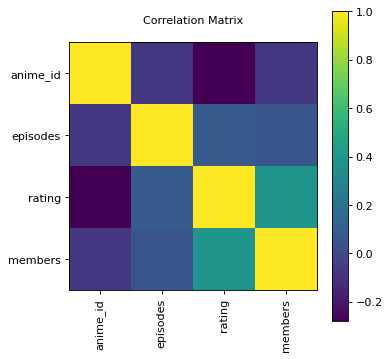

In [ ]:
plotCorrelationMatrix(anime_dataset,5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


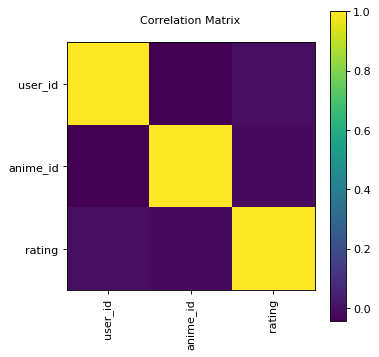

In [ ]:
plotCorrelationMatrix(ratings,5)

# Changing the name of the genere

In [ ]:
# adapted from https://www.kaggle.com/code/aminejallouli/genre-classification-based-on-wiki-movies-plots/notebook
anime_dataset['Genre'] =anime_data['genre'] 
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Sci-Fi','sciencefiction')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Slice of Life','sliceoflife')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Action','action')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Hentai','adult')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Yaoi','adult')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Yuri','adult')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Space','sciencefiction')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Comedy','comedy')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Drama','drama')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Parody','parody')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Sports','sports')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Cars','sports')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Shounen Ai','adult')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Shoujo Ai','adult')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Harem','adult')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Kids','children')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Fantasy','fantasy')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Police','police')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Shoujo Ai','adult')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Vampire','vampire')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Samurai','samurai')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('School','school')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Shounen','shounen')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Seinen','seinen')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Music','music')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Ecchi','adult')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Adventure','adventure')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Romance','romance')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Supernatural','supernatural')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Mecha','action')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Magic','magic')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Historical','historical')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Mystery','mystry')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Horror','horror')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Super Power','action')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Military','military')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Demons','demons')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Psychological','psychological')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Game','game')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Josei','josei')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Dementia','dementia')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Thriller','thriller')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Martial Arts','action')
anime_dataset['Genre']=anime_dataset['Genre'].str.replace('Shoujo','shoujo')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
anime_dataset.drop(["genre","members"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
anime_dataset['Genre'] = anime_dataset['Genre'].str.strip('[]').str.replace(' ','').str.replace("'","")
anime_dataset['Genre'] = anime_dataset['Genre'].str.split(',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


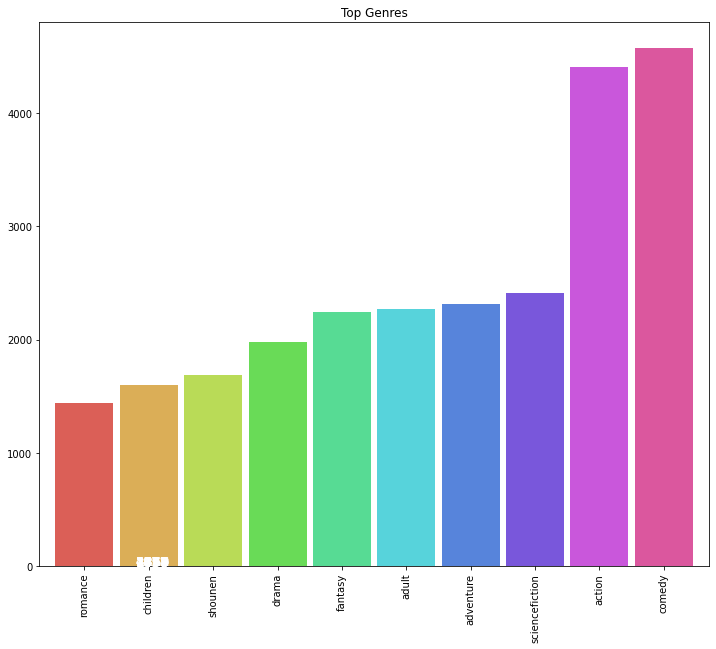

In [ ]:
plt.subplots(figsize=(12,10))
list1 = []
for i in anime_dataset['Genre']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.bar(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

,index,anime_id,name,type,rating
0,11816,33662,Taka no Tsume 8: Yoshida-kun no X-Files,Movie,10.00
1,10346,30120,Spoon-hime no Swing Kitchen,TV,9.60
2,8827,23005,Mogura no Motoro,Movie,9.50
3,11246,32281,Kimi no Na wa.,Movie,9.37
4,11809,33607,Kahei no Umi,Movie,9.33
5,3973,5114,Fullmetal Alchemist: Brotherhood,TV,9.26
6,9541,26313,Yakusoku: Africa Mizu to Midori,OVA,9.25
7,9911,28977,Gintama°,TV,9.25
8,5688,9253,Steins;Gate,TV,9.17
9,6013,9969,Gintama&#039;,TV,9.16


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,index,anime_id,name,type,rating
12007,10994,31634,Kokuhaku,ONA,2.67
12008,10241,29949,Nami,Movie,2.67
12009,11895,33863,Cakes,ONA,2.58
12010,9121,24259,Mechano: Scientific Attack Force,OVA,2.55
12011,7190,14781,Roboteuwang Sseonsyakeu,Movie,2.49
12012,387,413,Hametsu no Mars,OVA,2.37
12013,6981,13405,Utsu Musume Sayuri,OVA,2.14
12014,2936,3287,Tenkuu Danzai Skelter+Heaven,OVA,2.00
12015,8217,20007,Hi Gekiga Ukiyoe Senya Ichiya,Movie,1.92
12016,12012,34476,Platonic Chain: Ansatsu Jikkouchuu,Special,1.67


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


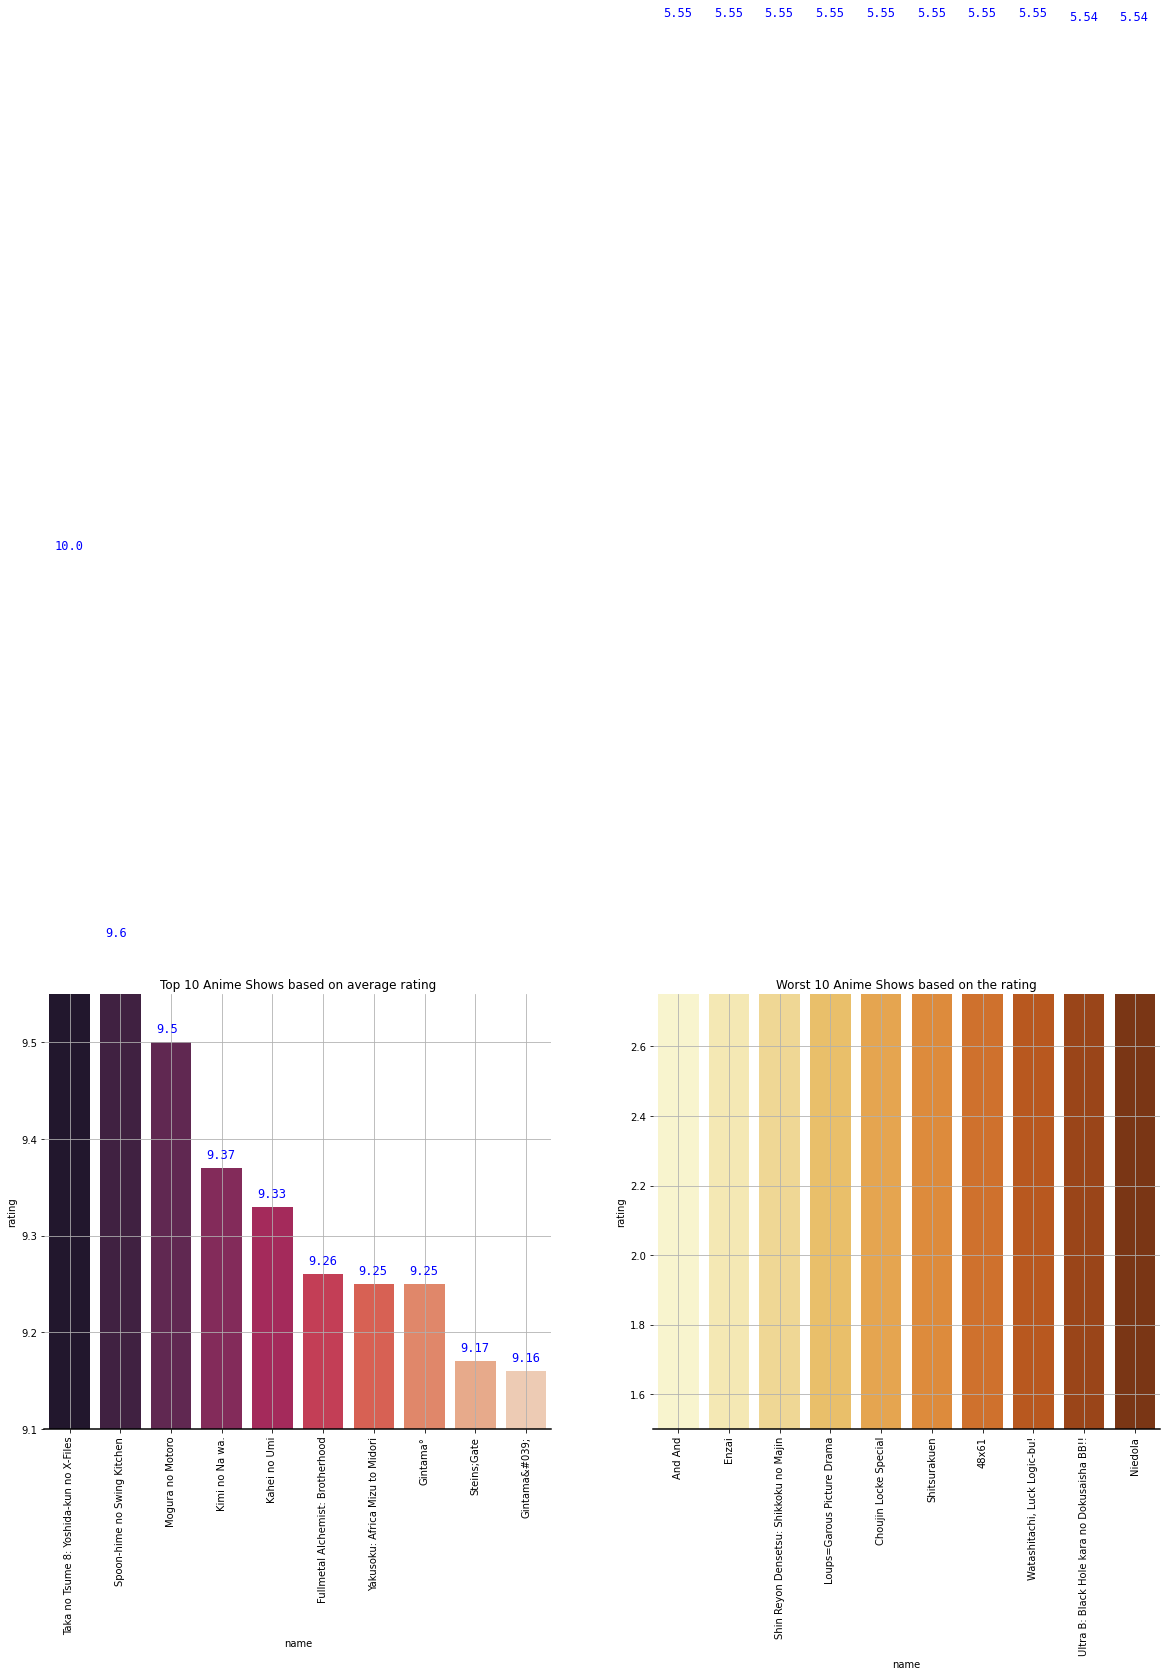

In [ ]:
#Average Rating of each Anime
grouped_by_anime_id = anime_dataset.groupby(["anime_id","name","type"])[["rating"]].mean().reset_index()
sorted_grouped_by_anime_id = grouped_by_anime_id.sort_values(by = ["rating"],ascending=False).reset_index()

#Plot top 10 based on average rating of each show.
display(sorted_grouped_by_anime_id.head(10))
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plot = sns.barplot(sorted_grouped_by_anime_id.name[:10], sorted_grouped_by_anime_id["rating"][:10], palette ="rocket")
plot.spines['bottom'].set_linewidth(1.5)
for w in ['right', 'top', 'left']:
    plot.spines[w].set_visible(False)
plt.title("Top 10 Anime Shows based on average rating")
plt.ylim(9.1,9.55)
plt.xticks(rotation=90)
plt.grid()

k=0
for p in plot.patches:
    height = p.get_height()
    plt.text(p.get_x()+0.1,height+0.01, sorted_grouped_by_anime_id["rating"][k],fontname = 'monospace', fontsize = 12, color = 'Blue') 
    k+=1


grouped_by_anime_id = anime_dataset.groupby(["anime_id","name","type"])[["rating"]].mean().reset_index()
sorted_grouped_by_anime_id = grouped_by_anime_id.sort_values(by = ["rating"],ascending=False).reset_index()

display(sorted_grouped_by_anime_id.tail(10))
plt.subplot(1, 2, 2)
B = sns.barplot(sorted_grouped_by_anime_id.name[9984:9994], sorted_grouped_by_anime_id["rating"][9984:9994], palette ="YlOrBr")
B.spines['bottom'].set_linewidth(1.5)
for w in ['right', 'top', 'left']:
    B.spines[w].set_visible(False)
    
k=9984
for p in B.patches:
    height = p.get_height()
    plt.text(p.get_x()+0.1,height+0.01, sorted_grouped_by_anime_id["rating"][k],fontname = 'monospace', fontsize = 12, color = 'Blue') 
    k+=1

plt.title("Worst 10 Anime Shows based on the rating")
plt.ylim(1.5,2.75)
plt.xticks(rotation=90)
plt.grid()
plt.show()




In [ ]:
# adapted from https://www.analyticsvidhya.com/blog/2020/08/recommendation-system-k-nearest-neighbors/

genreList = []
for index, row in anime_dataset.iterrows():
    genres = row["Genre"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

['drama',
 'romance',
 'school',
 'supernatural',
 'action',
 'adventure',
 'fantasy',
 'magic',
 'military',
 'shounen']

In [ ]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [ ]:
anime_dataset['bin'] = anime_dataset['Genre'].apply(lambda x: binary(x))
anime_dataset['bin'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...
Name: bin, dtype: object

In [ ]:
from scipy import spatial
def Similar(anime_id1, anime_id2):
    anime_1 = anime_dataset.iloc[anime_id1]
    anime_2 = anime_dataset.iloc[anime_id2]
    
    genres_1=anime_1['bin']
    genres_2=anime_1['bin']
    
    dist = spatial.distance.cosine(genres_1, genres_2)

    return dist

In [ ]:
anime_dataset.columns

Index(['anime_id', 'name', 'type', 'episodes', 'rating', 'Genre', 'bin'], dtype='object')

In [ ]:
newid = list(range(0,anime_dataset.shape[0]))
anime_dataset['newid']=newid
anime_dataset=anime_dataset[['name','Genre','rating', 'bin','newid','type','episodes']]
anime_dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,Genre,rating,bin,newid,type,episodes
0,Kimi no Na wa.,"[drama, romance, school, supernatural]",9.37,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,Movie,1
1,Fullmetal Alchemist: Brotherhood,"[action, adventure, drama, fantasy, magic, mil...",9.26,"[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...",1,TV,64
2,Gintama°,"[action, comedy, historical, parody, samurai, ...",9.25,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",2,TV,51
3,Steins;Gate,"[sciencefiction, thriller]",9.17,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",3,TV,24
4,Gintama&#039;,"[action, comedy, historical, parody, samurai, ...",9.16,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",4,TV,51


In [ ]:
# adapted from https://www.kaggle.com/code/heeraldedhia/movie-ratings-and-recommendation-using-knn/notebook

import base64
import operator
import io

def predict_score(name_selection):
    #name_selection = input('Enter a anime title: ')
    new_anime = anime_dataset[anime_dataset['name'].str.contains(name_selection)].iloc[0].to_frame().T
    print('Selected Anime: ',new_anime.name.values[0])
    def getNeighbors(baseAnime, K):
        distances = []
    
        for index, anime in anime_dataset.iterrows():
            if anime['newid'] != baseAnime['newid'].values[0]:
                distance_anime = Similar(baseAnime['newid'].values[0], anime['newid'])
                distances.append((anime['newid'], distance_anime))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_anime, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+anime_dataset.iloc[neighbor[0]][2]  
        print( anime_dataset.iloc[neighbor[0]][0]+" | Genres: "+str(anime_dataset.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(anime_dataset.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_anime['name'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_anime['name'].values[0],new_anime['rating']))

In [ ]:
 predict_score('Kimi no Na wa')

Selected Anime:  Kimi no Na wa.

Recommended Movies: 

Fullmetal Alchemist: Brotherhood | Genres: 'action','adventure','drama','fantasy','magic','military','shounen' | Rating: 9.26
Gintama° | Genres: 'action','comedy','historical','parody','samurai','sciencefiction','shounen' | Rating: 9.25
Steins;Gate | Genres: 'sciencefiction','thriller' | Rating: 9.17
Gintama&#039; | Genres: 'action','comedy','historical','parody','samurai','sciencefiction','shounen' | Rating: 9.16
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou | Genres: 'comedy','drama','school','shounen','sports' | Rating: 9.15
Hunter x Hunter (2011) | Genres: 'action','adventure','shounen','action' | Rating: 9.13
Ginga Eiyuu Densetsu | Genres: 'drama','military','sciencefiction','sciencefiction' | Rating: 9.11
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare | Genres: 'action','comedy','historical','parody','samurai','sciencefiction','shounen' | Rating: 9.1
Gintama&#039;: Enchousen | Genres: 'action','comedy','histo

In [ ]:
 predict_score('Violence Gekiga Shin David no Hoshi: Inma Dens')

Selected Anime:  Violence Gekiga Shin David no Hoshi: Inma Densetsu

Recommended Movies: 

Kimi no Na wa. | Genres: 'drama','romance','school','supernatural' | Rating: 9.37
Fullmetal Alchemist: Brotherhood | Genres: 'action','adventure','drama','fantasy','magic','military','shounen' | Rating: 9.26
Gintama° | Genres: 'action','comedy','historical','parody','samurai','sciencefiction','shounen' | Rating: 9.25
Steins;Gate | Genres: 'sciencefiction','thriller' | Rating: 9.17
Gintama&#039; | Genres: 'action','comedy','historical','parody','samurai','sciencefiction','shounen' | Rating: 9.16
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou | Genres: 'comedy','drama','school','shounen','sports' | Rating: 9.15
Hunter x Hunter (2011) | Genres: 'action','adventure','shounen','action' | Rating: 9.13
Ginga Eiyuu Densetsu | Genres: 'drama','military','sciencefiction','sciencefiction' | Rating: 9.11
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare | Genres: 'action','comedy','historical','

In [ ]:
# Content Based Recommender using Tfdf vectorizer
# adapted from https://github.com/adbandy/Personal-Projects/blob/main/Spam%20Filter.ipynb
genres= []
for i in anime_dataset.Genre.values:
  if isinstance(i, list):
    for j in i:
      genres.append(j)
  else:
    genres.append(i)


genre_set = set(genres)
print(genre_set)




{'shounen', 'parody', 'historical', 'police', 'sports', 'horror', 'magic', 'romance', 'vampire', 'thriller', 'supernatural', 'seinen', 'samurai', 'sciencefiction', 'shoujo', 'children', 'game', 'school', 'drama', 'adult', 'music', 'sliceoflife', 'military', 'mystry', 'psychological', 'josei', 'action', 'fantasy', 'dementia', 'adventure', 'demons', 'comedy'}


In [ ]:
anime_dataset

,name,Genre,rating,bin,newid,type,episodes
0,Kimi no Na wa.,"[drama, romance, school, supernatural]",9.37,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,Movie,1
1,Fullmetal Alchemist: Brotherhood,"[action, adventure, drama, fantasy, magic, mil...",9.26,"[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...",1,TV,64
2,Gintama°,"[action, comedy, historical, parody, samurai, ...",9.25,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",2,TV,51
3,Steins;Gate,"[sciencefiction, thriller]",9.17,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",3,TV,24
4,Gintama&#039;,"[action, comedy, historical, parody, samurai, ...",9.16,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",4,TV,51
...,...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,[adult],4.15,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12012,OVA,1
12290,Under World,[adult],4.28,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12013,OVA,1
12291,Violence Gekiga David no Hoshi,[adult],4.88,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12014,OVA,4
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,[adult],4.98,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12015,OVA,1


In [ ]:
# adapted from https://github.com/adbandy/Personal-Projects/blob/main/Spam%20Filter.ipynb
# Hot encoding of genre colum 
genre_count = {unique_word: [0] * len(anime_dataset['Genre']) for unique_word in genre_set}
print(len(genre_count))
anime_dataset= anime_dataset.dropna(subset = ['rating', 'Genre','type'])

for index, genre in enumerate(anime_dataset['Genre']):
    if isinstance(genre, list):
      for word in genre:
        genre_count[word][index] += 1
    else:
      genre_count[genre][index] += 1

genre_database = pd.DataFrame(genre_count)
print(len(genre_count))
#genre_database = genre_database.drop(columns = 'nan')
genre_database = genre_database
genre_database

32
32


,shounen,parody,historical,police,sports,horror,magic,romance,vampire,thriller,...,military,mystry,psychological,josei,action,fantasy,dementia,adventure,demons,comedy
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,1,0,1,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(genre_database, genre_database)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (12017, 12017)


In [ ]:
# adapted from https://www.jillcates.com/pydata-workshop/html/tutorial.html
def anime_finder(title):
    return anime_dataset[anime_dataset['name'].str.contains(title)]['name'].tolist()


anime_idx = dict(zip(anime_dataset['name'], list(anime_dataset.index)))
liked_name=input('Enter an anime you like : ')
title = anime_finder(liked_name)[0]
n_recommendations = 10

idx = anime_idx[title]
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
similar_anime = [i[0] for i in sim_scores]

print(f"Recommendations for {title}:")
anime_dataset['name'].iloc[similar_anime]

Enter an anime you like : Naruto
Recommendations for Boruto: Naruto the Movie:


615                                    Naruto: Shippuuden
841                                                Naruto
1103    Boruto: Naruto the Movie - Naruto ga Hokage ni...
1343                                          Naruto x UT
1472          Naruto: Shippuuden Movie 4 - The Lost Tower
1573    Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
2458                 Naruto Shippuuden: Sunny Side Battle
2997    Naruto Soyokazeden Movie: Naruto to Mashin to ...
175                                Katekyo Hitman Reborn!
7837                        Battle Spirits: Ryuuko no Ken
Name: name, dtype: object

In [ ]:
# Collaborative Filtering Recommender Systems

In [ ]:
target=ratings.copy()
target=target[target['user_id']<10000]
target

,user_id,anime_id,rating
0,1,20.0,-1.0
1,1,24.0,-1.0
2,1,79.0,-1.0
3,1,226.0,-1.0
4,1,241.0,-1.0
...,...,...,...
1042663,9999,19815.0,9.0
1042664,9999,22145.0,10.0
1042665,9999,22199.0,9.0
1042666,9999,23317.0,10.0


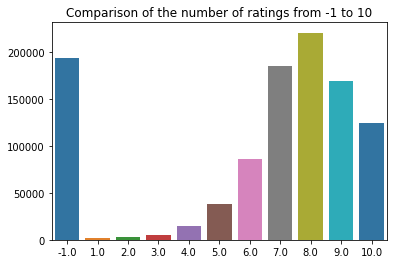

In [ ]:
# adapted from https://www.kaggle.com/code/indralin/try-content-based-and-collaborative-filtering/notebook
rating_count = target['rating'].value_counts().sort_index()

sns.barplot(x=rating_count.index,
            y=rating_count.values,
            palette='tab10').set_title('Comparison of the number of ratings from -1 to 10');

In [ ]:
### step 1 - filter only rating from 6 to 10

mask = (target['rating'] == -1) | (target['rating'] == 1) | (target['rating'] == 2) | (target['rating'] == 3) | (target['rating'] == 4) | (target['rating'] == 5)

target = target.loc[~mask]

target=target[target['user_id']<10000]
target

,user_id,anime_id,rating
47,1,8074.0,10.0
81,1,11617.0,10.0
83,1,11757.0,10.0
101,1,15451.0,10.0
153,2,11771.0,10.0
...,...,...,...
1042663,9999,19815.0,9.0
1042664,9999,22145.0,10.0
1042665,9999,22199.0,9.0
1042666,9999,23317.0,10.0


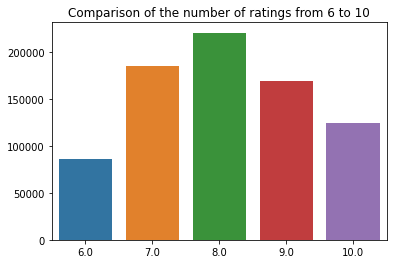

In [ ]:
count_ratings = target['rating'].value_counts().sort_index()

sns.barplot(x=count_ratings.index,
            y=count_ratings.values,
            palette='tab10').set_title('Comparison of the number of ratings from 6 to 10');

In [ ]:
### step 2 - changed rating value from 6 - 10, to 1 - 5

def change_rating(rating):
    if rating == 6:
        return 1
    elif rating == 7:
        return 2
    elif rating == 8:
        return 3
    elif rating == 9:
        return 4
    elif rating == 10:
        return 5
    
target['rating'] = target['rating'].apply(change_rating)

In [ ]:
#Splitting the data using train test split
X_train,testing_data = train_test_split(target, test_size=0.20)
print("Training data : ", X_train.shape)
print("Testing data : ", testing_data.shape)


Training data :  (628146, 3)
Testing data :  (157037, 3)


In [ ]:
target

,user_id,anime_id,rating
47,1,8074,5
81,1,11617,5
83,1,11757,5
101,1,15451,5
153,2,11771,5
...,...,...,...
1042663,9999,19815,4
1042664,9999,22145,5
1042665,9999,22199,4
1042666,9999,23317,5


# Singular Value Decomposition (SVD)

In [62]:
# adapted from https://surprise.readthedocs.io/en/stable/prediction_algorithms.html
reader = Reader(rating_scale=(1, 5))
training_data=Dataset.load_from_df(X_train[['user_id','anime_id','rating']], reader)
data_testing=Dataset.load_from_df(testing_data[['user_id','anime_id','rating']], reader)

# Building the  full trainset
training_data=training_data.build_full_trainset()
data_testing=data_testing.build_full_trainset()

# Building full testset
dt_trainset= training_data.build_testset()
dt_testset= data_testing.build_testset()



In [64]:
# The SVD with the default values

reader = Reader(rating_scale=(1, 5))
training_data=Dataset.load_from_df(X_train[['user_id','anime_id','rating']], reader)
data_testing=Dataset.load_from_df(testing_data[['user_id','anime_id','rating']], reader)

svd = SVD(verbose=True, n_epochs=20)
cross_validate(svd, training_data, measures=['RMSE', 'MAE'], cv=10, verbose=True)


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing

{'test_rmse': array([0.98024553, 0.97582335, 0.98019124, 0.970884  , 0.97743034,
        0.97413875, 0.97713732, 0.97407156, 0.97881646, 0.97531188]),
 'test_mae': array([0.78228466, 0.7766311 , 0.78084466, 0.77306161, 0.77862888,
        0.77621568, 0.77945703, 0.77755395, 0.77948727, 0.77810269]),
 'fit_time': (43.4922308921814,
  48.84298014640808,
  40.61475372314453,
  40.461196184158325,
  41.142383337020874,
  40.5320885181427,
  40.59619927406311,
  40.28283429145813,
  40.407301902770996,
  40.90682363510132),
 'test_time': (1.8638300895690918,
  1.0542025566101074,
  0.5782403945922852,
  0.6422452926635742,
  1.0710079669952393,
  1.0934512615203857,
  0.5557582378387451,
  1.0376546382904053,
  1.052149772644043,
  0.5708649158477783)}

In [65]:

# RMSE for the testset

predictions = svd.test(dt_testset)

# Compute and print Root Mean Squared Error
print(accuracy.rmse(predictions, verbose=True))
print(accuracy.mae(predictions, verbose=True))






RMSE: 0.9800
0.9800155770173264
MAE:  0.7819
0.7818607893559254


In [ ]:
# To check the predicted rating to the actual rating
target[target['user_id'] == 124]

,user_id,anime_id,rating
10015,124,20,2
10016,124,68,2
10018,124,269,3
10019,124,392,4
10020,124,479,3
10021,124,1535,2
10022,124,1575,3
10023,124,1604,3
10024,124,5114,5
10025,124,6421,5


In [66]:
# Checking the estimated ratings
svd.predict(5,125, 2 )

Prediction(uid=5, iid=125, r_ui=2, est=1.1130517981442614, details={'was_impossible': False})

In [98]:
# RMSE vs the number of factors comparision ofr the training data
# 10 fold is used for validation 

# applied using from https://github.com/jiristo/recsys_matrixfactorization/blob/master/recsys.ipynb
def rmsesvsfactors(algorithm, data):
  """Returns: rmse_algorithm i.e. a list of mean RMSE of CV = 5 in cross_validate() for each  factor k in range(1, 101, 1)
  100 values 
  Arg:  i.) algorithm = Matrix factoization algorithm, e.g SVD/NMF/PMF, ii.)  data = surprise.dataset.DatasetAutoFolds
  """
  
  rmse_algorithm = []
  
  for k in range(1, 100, 1):
    algo = algorithm(n_factors = k)
    
    #["test_rmse"] is a numpy array with min accuracy value for each testset
    loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=10, verbose=False)["test_rmse"].mean() 
    rmse_algorithm.append(loss_fce)
  
  return rmse_algorithm

In [ ]:
reader = Reader(rating_scale=(1, 5))
training_data=Dataset.load_from_df(X_train[['user_id','anime_id','rating']], reader)
data_testing=Dataset.load_from_df(testing_data[['user_id','anime_id','rating']], reader)

rmse= rmsesvsfactors(SVD, training_data)

In [82]:
# FAQ — surprise 1 documentation [Internet]. Readthedocs.io. [cited 2022 Sep 18]. Available from: https://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision%20vs%20recall

# Return precision and recall at k metrics for each user
def precision_recall_at_k(predictions, k = 10, threshold = 3.5):
    
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        
        # Sorting the user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        
        # Number of relevant items 
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        
        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        
        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])
        
        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        
        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1
    
    return precisions, recalls;

In [83]:
# https://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k
# Returns the precision and recall of the model at k metrics
def get_precision_vs_recall(algo, k_max = 10, verbose = False):
    l1_precission = []
    l2_recall = []
    f1_list = []
    
    if algo:
        for k_curr in range(1, k_max + 1):
            algo.fit(training_data)
            predictions = algo.test(dt_testset)
            
            # Get precision and recall at k metrics for each user
            precisions, recalls = precision_recall_at_k(predictions, k = k_curr, threshold = 4)
            
            # Precision and recall can then be averaged over all users
            precision = sum(prec for prec in precisions.values()) / len(precisions)
            recall = sum(rec for rec in recalls.values()) / len(recalls)
            f1_score = 2 * (precision * recall) / (precision + recall)
            
            # Save measures
            l1_precission.append(precision)
            l2_recall.append(recall)
            f1_list.append(f1_score)
            
            if verbose:
                print('K =', k_curr, '- Precision:', precision, ', Recall:', recall, ', F1 score:', f1_score)
    
    return {'precision': l1_precission, 'recall': l2_recall, 'f1_score': f1_list};

In [93]:
# Building full testset
eader = Reader(rating_scale=(1, 5))
training_data=Dataset.load_from_df(X_train[['user_id','anime_id','rating']], reader)
data_testing=Dataset.load_from_df(testing_data[['user_id','anime_id','rating']], reader)

# Building the  full trainset
training_data=training_data.build_full_trainset()
data_testing=data_testing.build_full_trainset()

# Building full testset
dt_trainset= training_data.build_testset()
dt_testset= data_testing.build_testset()



k_max = 20
metrics_svd = get_precision_vs_recall(svd, k_max, True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
K = 1 - Precision: 0.9087893864013267 , Recall: 0.19198406000477092 , F1 score: 0.3170008808991648
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
K = 2 - Precision: 0.9051764984600805 , Recall: 0.23416632376094051 , F1 score: 0.37207739209872204
Processing epoch 0
Pr

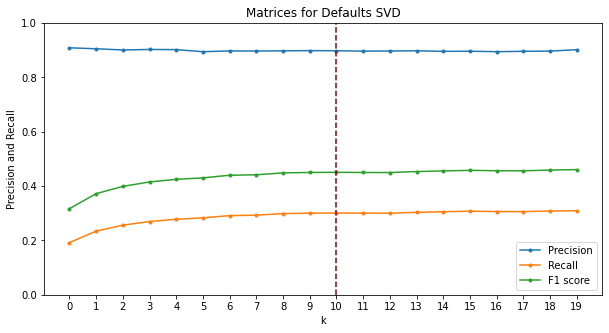

In [94]:
# Get data
precision_mat = metrics_svd['precision']
recall_mat = metrics_svd['recall']
f1measure = metrics_svd['f1_score']
x = np.arange(len(precision_mat))

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x), max(x) + 1, 1.0))
plt.ylim(0, 1)
ax1.plot(x, precision_mat, marker = '.')
ax1.plot(x, recall_mat, marker = '.')
ax1.plot(x, f1measure, marker = '.')
ax1.axvline(x = 10, color = "#8b0000", linestyle = "--")

# Chart setup
plt.title("Matrices for Defaults SVD", fontsize = 12)
plt.xlabel("k", fontsize = 10)
plt.ylabel("Precision and Recall", fontsize = 10)
plt.legend(("Precision", "Recall", "F1 score"), loc = "best")
plt.draw()


#### Searching for best parameters using Grid Search for SVD

In [ ]:
training_data=Dataset.load_from_df(X_train[['user_id','anime_id','rating']], reader)
data_testing=Dataset.load_from_df(testing_data[['user_id','anime_id','rating']], reader)

param_grid = {'n_factors':[50,100,150],'n_epochs':[20,30],  'lr_all':[0.005,0.01],'reg_all':[0.02,0.1]}


best_model=GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)
best_model.fit(training_data)



In [ ]:
parameters=best_model.best_params['rmse']

In [ ]:
parameters

{'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}

In [ ]:
tuned_svd = SVD(n_factors=parameters['n_factors'], n_epochs=parameters['n_epochs'],lr_all=parameters['lr_all'], reg_all=parameters['reg_all'])
cross_validate(tuned_svd, training_data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9588  0.9549  0.9538  0.9524  0.9533  0.9568  0.9573  0.9522  0.9524  0.9523  0.9544  0.0023  
MAE (testset)     0.7701  0.7658  0.7670  0.7657  0.7667  0.7709  0.7711  0.7663  0.7648  0.7651  0.7674  0.0023  
Fit time          72.97   72.62   72.86   70.80   71.76   72.43   72.63   72.11   71.72   72.49   72.24   0.63    
Test time         0.94    1.16    0.50    0.58    1.21    1.00    0.46    1.13    1.13    0.45    0.86    0.30    


{'test_rmse': array([0.95878109, 0.95492164, 0.95382717, 0.95244815, 0.95325677,
        0.95677404, 0.95733252, 0.95222299, 0.9523881 , 0.95234359]),
 'test_mae': array([0.77014519, 0.76580335, 0.76704604, 0.76573339, 0.76667367,
        0.77093277, 0.77105203, 0.76625764, 0.76484003, 0.76505719]),
 'fit_time': (72.97495746612549,
  72.62151861190796,
  72.86195778846741,
  70.80108141899109,
  71.75816679000854,
  72.42655944824219,
  72.63008260726929,
  72.10986518859863,
  71.71806001663208,
  72.4916832447052),
 'test_time': (0.9395937919616699,
  1.1571366786956787,
  0.49669742584228516,
  0.5837786197662354,
  1.2072618007659912,
  1.0040950775146484,
  0.462893009185791,
  1.1320250034332275,
  1.1347136497497559,
  0.4461376667022705)}

In [ ]:
predictions = tuned_svd.test(dt_testset)

In [ ]:
training_data=Dataset.load_from_df(X_train[['user_id','anime_id','rating']], reader)
data_testing=Dataset.load_from_df(testing_data[['user_id','anime_id','rating']], reader)

# Building the  full trainset
training_data=training_data.build_full_trainset()
data_testing=data_testing.build_full_trainset()

# Building full testset
dt_trainset= training_data.build_testset()
dt_testset= data_testing.build_testset()

k_max = 30
tuned_svd=SVD(n_factors=150, n_epochs=30,lr_all=0.01, reg_all= 0.1 )
metrics_svd_tuned = get_precision_vs_recall(tuned_svd, k_max, True)

K = 1 - Precision: 0.9469320066334992 , Recall: 0.18150436362088485 , F1 score: 0.3046202617831531
K = 2 - Precision: 0.943319118692253 , Recall: 0.22136371280844605 , F1 score: 0.35858109491980256
K = 3 - Precision: 0.9412264076443203 , Recall: 0.24028086740554372 , F1 score: 0.3828308169227928
K = 4 - Precision: 0.9376924899312965 , Recall: 0.25243591135019317 , F1 score: 0.397784403778887
K = 5 - Precision: 0.9383972992181996 , Recall: 0.26001400432369676 , F1 score: 0.4071998297998968
K = 6 - Precision: 0.9376589275843012 , Recall: 0.26615776608697644 , F1 score: 0.414623267527964
K = 7 - Precision: 0.9367115668821435 , Recall: 0.2713265079195883 , F1 score: 0.4207726290609355
K = 8 - Precision: 0.9356755056914983 , Recall: 0.2720012004978394 , F1 score: 0.42147846277099527
K = 9 - Precision: 0.9350910319904634 , Recall: 0.2764478711046588 , F1 score: 0.42673648270380954
K = 10 - Precision: 0.933955458911041 , Recall: 0.27678864125938757 , F1 score: 0.42702378220531706
K = 11 - Pre

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [87]:
hist_SVD_124, pred_SVD_124 = get_top_n(predictions, movies_df = anime_data, user_id = 124, ratings_df = target)

User 124 has already rated 19 animes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


KeyError: ignored

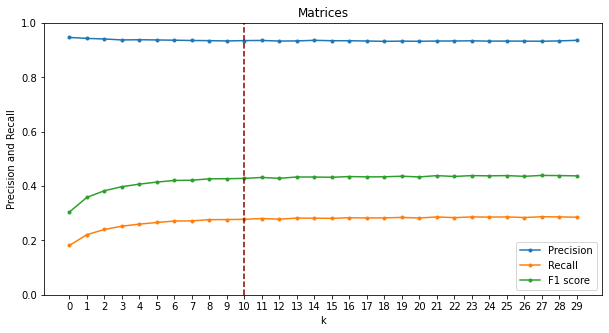

In [58]:
# Get data
precision_mat = metrics_svd_tuned['precision']
recall_mat = metrics_svd_tuned['recall']
f1measure = metrics_svd_tuned['f1_score']
x = np.arange(len(precision_mat))

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x), max(x) + 1, 1.0))
plt.ylim(0, 1)
ax1.plot(x, precision_mat, marker = '.')
ax1.plot(x, recall_mat, marker = '.')
ax1.plot(x, f1measure, marker = '.')
ax1.axvline(x = 10, color = "#8b0000", linestyle = "--")

# Chart setup
plt.title("Matrices", fontsize = 12)
plt.xlabel("k", fontsize = 10)
plt.ylabel("Precision and Recall", fontsize = 10)
plt.legend(("Precision", "Recall", "F1 score"), loc = "best")
plt.draw()

In [ ]:
from surprise.prediction_algorithms import NMF
# Non Nagative Matrix NMF
